<a href="https://colab.research.google.com/github/SimraRafiq/Deep_Learning-assignment/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [ ]:
cpc_data=pd.read_csv("CarPrice_Assignment.csv")
display(cpc_data.head (n=5))


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cpc_data.shape

(205, 26)

In [ ]:
cpc_data.ndim

2

In [ ]:
cpc_data.iloc[4]

car_ID                       5
symboling                    2
CarName             audi 100ls
fueltype                   gas
aspiration                 std
doornumber                four
carbody                  sedan
drivewheel                 4wd
enginelocation           front
wheelbase                 99.4
carlength                176.6
carwidth                  66.4
carheight                 54.3
curbweight                2824
enginetype                 ohc
cylindernumber            five
enginesize                 136
fuelsystem                mpfi
boreratio                 3.19
stroke                     3.4
compressionratio             8
horsepower                 115
peakrpm                   5500
citympg                     18
highwaympg                  22
price                    17450
Name: 4, dtype: object

In [ ]:
cpc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
pd.isnull(cpc_data).sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
cpc_data['fueltype'] = labelencoder.fit_transform(cpc_data['fueltype'])
cpc_data['aspiration'] = labelencoder.fit_transform(cpc_data['aspiration'])
cpc_data['carbody'] = labelencoder.fit_transform(cpc_data['carbody'])
cpc_data['drivewheel'] = labelencoder.fit_transform(cpc_data['drivewheel'])
cpc_data['enginelocation'] = labelencoder.fit_transform(cpc_data['enginelocation'])
cpc_data['fuelsystem'] = labelencoder.fit_transform(cpc_data['enginelocation'])
cpc_data["cylindernumber"]=labelencoder.fit_transform(cpc_data["cylindernumber"])
cpc_data['enginetype'] = labelencoder.fit_transform(cpc_data['enginetype'])
cpc_data['doornumber'] = labelencoder.fit_transform(cpc_data['doornumber'])
cpc_data['doornumber'] = labelencoder.fit_transform(cpc_data['doornumber'])
cpc_data['CarName'] = labelencoder.fit_transform(cpc_data['CarName'])

In [ ]:
cpc_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cpc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int64  
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [ ]:
cpc_data["carheight"]

0      48.8
1      48.8
2      52.4
3      54.3
4      54.3
       ... 
200    55.5
201    55.5
202    55.5
203    55.5
204    55.5
Name: carheight, Length: 205, dtype: float64

In [ ]:
x=cpc_data.loc[0:,"car_ID":"highwaympg"]
y=cpc_data.loc[0:,"price"]


In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_labels,test_labels=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
train_data=np.asarray(train_data).astype("float32")
test_data=np.asarray(test_data).astype("float32")


In [ ]:
test_data[5]

array([9.600e+01, 1.000e+00, 7.400e+01, 1.000e+00, 0.000e+00, 1.000e+00,
       2.000e+00, 1.000e+00, 0.000e+00, 9.450e+01, 1.656e+02, 6.380e+01,
       5.330e+01, 2.028e+03, 3.000e+00, 2.000e+00, 9.700e+01, 0.000e+00,
       3.150e+00, 3.290e+00, 9.400e+00, 6.900e+01, 5.200e+03, 3.100e+01,
       3.700e+01], dtype=float32)

In [ ]:
train_labels=np.asarray(train_labels).astype("float32")
test_labels=np.asarray(test_labels).astype("float32")

In [ ]:

test_labels

array([30760.   , 17859.168,  9549.   , 11850.   , 28248.   ,  7799.   ,
        7788.   ,  9258.   , 10198.   ,  7775.   , 13295.   ,  8238.   ,
       18280.   ,  9988.   , 40960.   ,  6488.   ,  5151.   , 12629.   ,
        8189.   ,  9960.   ,  8495.   , 13499.   ,  8249.   ,  6479.   ,
        6692.   , 41315.   ,  9639.   , 13415.   ,  7999.   , 12940.   ,
       25552.   ,  6229.   ,  7898.   , 21485.   ,  7689.   , 28176.   ,
       11259.   , 10945.   ,  8916.5  , 14489.   ,  7463.   , 18344.   ,
       15580.   ,  6918.   ,  7499.   ,  9095.   ,  6229.   ,  7053.   ,
       16900.   , 12964.   ,  6295.   , 16558.   ,  7099.   ,  8948.   ,
        7349.   , 15250.   ,  8449.   , 11845.   , 37028.   ,  5389.   ,
        9233.   , 17199.   ], dtype=float32)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(25,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
history=model.fit(train_data,train_labels,epochs=50,validation_split=0.20)


Epoch 1/50
4/4 [==============================] - 0s 35ms/step - loss: 30274354.0000 - mae: 4203.6123 - val_loss: 50786376.0000 - val_mae: 4887.6357
Epoch 2/50
4/4 [==============================] - 0s 17ms/step - loss: 29754454.0000 - mae: 4083.1853 - val_loss: 50407972.0000 - val_mae: 4807.1836
Epoch 3/50
4/4 [==============================] - 0s 16ms/step - loss: 29490988.0000 - mae: 4064.2986 - val_loss: 50995208.0000 - val_mae: 4679.1035
Epoch 4/50
4/4 [==============================] - 0s 18ms/step - loss: 29360542.0000 - mae: 3943.7683 - val_loss: 48500392.0000 - val_mae: 4784.4575
Epoch 5/50
4/4 [==============================] - 0s 18ms/step - loss: 28918510.0000 - mae: 4077.2195 - val_loss: 48037576.0000 - val_mae: 4709.4756
Epoch 6/50
4/4 [==============================] - 0s 17ms/step - loss: 28497986.0000 - mae: 3892.4102 - val_loss: 46631928.0000 - val_mae: 4821.3501
Epoch 7/50
4/4 [==============================] - 0s 17ms/step - loss: 28173672.0000 - mae: 4066.7515 - va

In [ ]:
test_loss,test_mae=model.evaluate(test_data,test_labels)
print("test_loss:",test_loss,"mae:",test_mae)


2/2 [==============================] - 0s 5ms/step - loss: 25169078.0000 - mae: 2985.1274
test_loss: 25169078.0 mae: 2985.12744140625


In [ ]:
model.predict(test_data)[5]

array([8096.175], dtype=float32)

In [ ]:
model.predict(test_data)[1:6]

array([[17651.564],
       [10698.458],
       [13534.761],
       [24923.938],
       [ 8096.175]], dtype=float32)

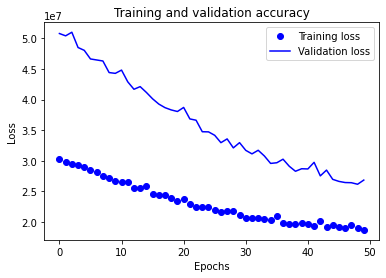

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(50)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

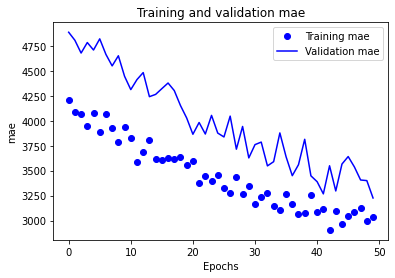

In [ ]:
mae = history_dict['mae'] 
val_mae = history_dict['val_mae'] 
plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae') 
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae') 
plt.legend()
plt.show()